**This Notebook contanins the use of SAM and Grounding DINO model**
* Can be used to detect objects
* Used to segment objects (instance segmentation)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from IPython import display

In [ ]:
!pip install segment_anything
display.clear_output()

In [ ]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [ ]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 388, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 388 (delta 20), reused 33 (delta 13), pack-reused 336
Receiving objects: 100% (388/388), 12.86 MiB | 9.90 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.2 MB/s eta 0:00:00


In [ ]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-hllo56v8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-hllo56v8
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


In [ ]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.
0.6.0


In [ ]:
import os
GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [ ]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [ ]:
import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [ ]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [ ]:
import os

SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:
import torch
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
SAM_ENCODER_VERSION = "vit_h"

In [ ]:
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

In [ ]:
from typing import List
import cv2
import supervision as sv
import numpy as np
from segment_anything import SamPredictor
import math
import glob

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

In [ ]:
def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

In [ ]:
def normalize_coordinates(row_i, col_j, img):
    num_rows, num_cols = img.shape[:2]
    x = col_j/(num_cols - 1.)
    y = row_i/(num_rows - 1.)
    return x, y

In [ ]:
def flip_mask_coordinates(mask, image_width):
    flipped_mask = np.copy(mask)
    flipped_mask[:, 0] = image_width - flipped_mask[:, 0]
    return flipped_mask

In [ ]:
def flip_image(image, dir):
      try:
          image = cv2.flip(image, dir)
          return image, "flip", True
      except:
          return image, "flip", False

In [ ]:
def getMask(SOURCE_IMAGE_PATH, CLASSES, BOX_TRESHOLD, TEXT_TRESHOLD, name):
  image = cv2.imread(SOURCE_IMAGE_PATH)
  # image = cv2.resize(image, (640, 640))
  # detect objects
  detections = grounding_dino_model.predict_with_classes(
      image=image,
      classes=enhance_class_name(class_names=CLASSES),
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD)
  # convert detections to masks
  detections.mask = segment(
      sam_predictor=sam_predictor,
      image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
      xyxy=detections.xyxy
  )
  class_map = {'gun': '0', 'bottle': '1', 'glass': '2'}
  maskSS = detections.mask
  # print(maskSS)
  box_annotator = sv.BoxAnnotator()
  mask_annotator = sv.MaskAnnotator()
  labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
  print(labels)
  cll = b = [i.split(" ")[0] for i in labels]
  print(cll)

  # image, type, status = flip_image(image, 1)
  height, width, _ = image.shape
  with open(str(name) + '.txt', 'w') as f:
    for qq, x in enumerate(maskSS):
      w = class_map[cll[qq]]
      print(cll[qq])
      # im = image
      # im[:, :] = [0, 0, 0]
      pixelpoints = np.array(np.nonzero(x))
      pixelpoints = np.array([pixelpoints[1], pixelpoints[0]]).T
      pts = pixelpoints.reshape((-1, 1, 2))
      rmpts = flip_mask_coordinates(pixelpoints, width)
      rmpts = pixelpoints.reshape((-1, 1, 2))
      cv2.polylines(image, rmpts, True, (255, 255, 255), 2)
      cv2_imshow(image)
      print("________________")
      # ret, threshed_img = cv2.threshold(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY), 10, 200, cv2.THRESH_BINARY)
      # # contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
      # contours, _ = cv2.findContours(threshed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      # # Convert the contour to the format required for segmentation in COCO format
      # # Write bounding boxes to file in YOLO format
      # for contour in contours:
      #     # Get the bounding box coordinates of the contour
      #     # cv2.drawContours(image, contours, -1, (0,255,0), 3)
      #     # cv2_imshow(image)
      #     arr_reshaped = contour.reshape(contour.shape[0], -1)
      #     segmentation = contour.flatten().tolist()
      #     print(segmentation)
      #     # x, y, w, h = cv2.boundingRect(contour)
      #     # Convert the coordinates to YOLO format and write to file
      #     partitioned_list = [segmentation[i:i + 2] for i in range(0, len(segmentation), 2)]
      #     f.write(str(w) +' ')
      #     for x,y in partitioned_list:
      #       x, y = normalize_coordinates(y, x, image)
      #       f.write(str(x) + ' ' + str(y) + ' ')
      #     f.write("\n")
      #     break
      break

  # annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)
  # %matplotlib inline
  # sv.plot_image(annotated_image, (16, 16))

['glass 0.59', 'glass 0.59', 'bottle 0.73']
['glass', 'glass', 'bottle']
glass


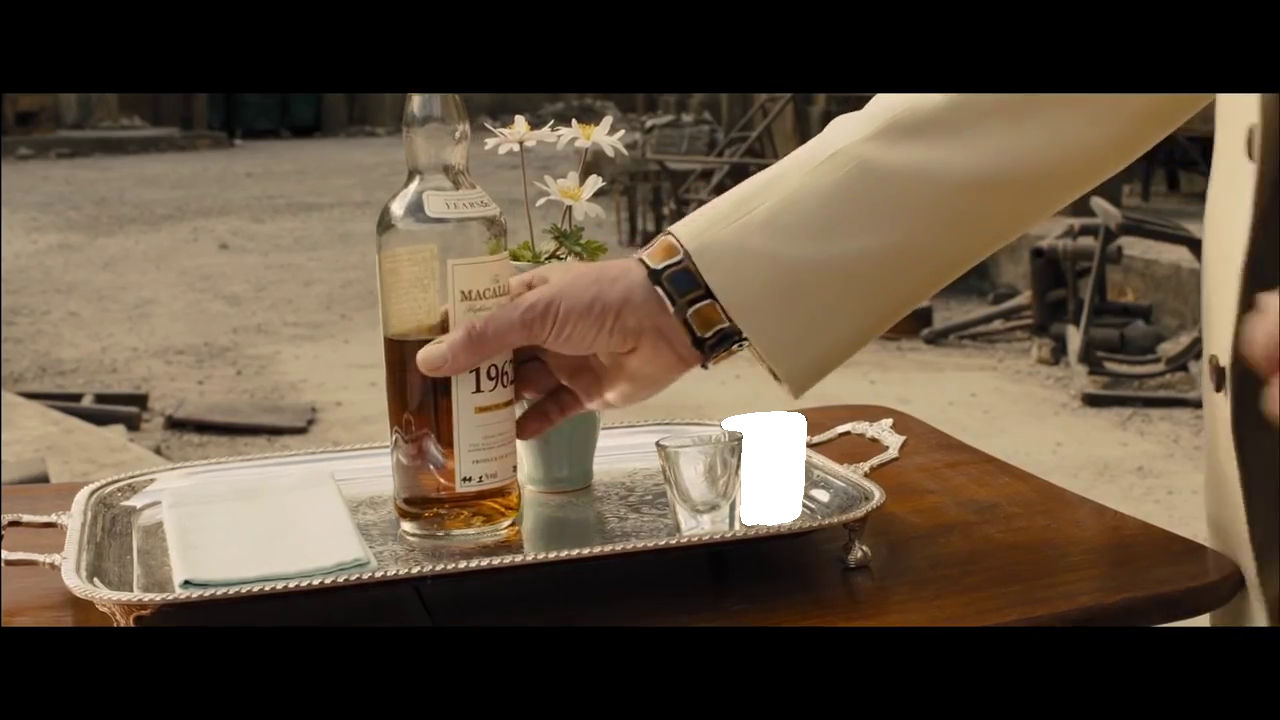

________________


In [ ]:
SOURCE_IMAGE_PATH = "/content/gdrive/My Drive/demoM/test_images/1.png"
name = SOURCE_IMAGE_PATH.split("/")
name = name[len(name) - 1].split(".")[0]
CLASSES = ['gun', 'bottle', 'glass']
BOX_TRESHOLD = 0.50
TEXT_TRESHOLD = 0.30
getMask(SOURCE_IMAGE_PATH, CLASSES, BOX_TRESHOLD, TEXT_TRESHOLD, name)

In [ ]:
def countours(img):
  try:
      ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 5, 255, cv2.THRESH_BINARY)
      contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
      for c in contours:
          arr_reshaped = c.reshape(c.shape[0], -1)
          return arr_reshaped

  except Exception as e:
      print("***********", e)

In [ ]:
CLASSES = ['gun', 'wine bottle', 'wine glass']
BOX_TRESHOLD = 0.40
TEXT_TRESHOLD = 0.25
for fi in glob.glob("/content/gdrive/My Drive/DINO/rt/*"):
  try:
    SOURCE_IMAGE_PATH = fi
    getMask(SOURCE_IMAGE_PATH, CLASSES, BOX_TRESHOLD, TEXT_TRESHOLD)
  except:
    pass

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
CLASSES = ["cigarette"]
BOX_TRESHOLD = 0.30
TEXT_TRESHOLD = 0.20
for fi in glob.glob("/content/gdrive/My Drive/DINO/smoking/*"):
  try:
    SOURCE_IMAGE_PATH = fi
    getMask(SOURCE_IMAGE_PATH, CLASSES, BOX_TRESHOLD, TEXT_TRESHOLD)
  except:
    pass

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
CLASSES = ["syringe", "medicine"]
BOX_TRESHOLD = 0.40
TEXT_TRESHOLD = 0.20
for fi in glob.glob("/content/gdrive/My Drive/DINO/drugs/*"):
  try:
    SOURCE_IMAGE_PATH = fi
    getMask(SOURCE_IMAGE_PATH, CLASSES, BOX_TRESHOLD, TEXT_TRESHOLD)
  except:
    pass

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
CLASSES = ['gore blood' , 'mutilated']
BOX_TRESHOLD = 0.40
TEXT_TRESHOLD = 0.30
for fi in glob.glob("/content/gdrive/My Drive/DINO/violence/*"):
  try:
    SOURCE_IMAGE_PATH = fi
    getMask(SOURCE_IMAGE_PATH, CLASSES, BOX_TRESHOLD, TEXT_TRESHOLD)
  except:
    pass

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%%bash --bg

bash ww.sh

In [ ]:
def getMask(SOURCE_IMAGE_PATH, CLASSES, BOX_TRESHOLD, TEXT_TRESHOLD):
  image = cv2.imread(SOURCE_IMAGE_PATH)
  # image = cv2.resize(image, (640, 640))
  # detect objects
  detections = grounding_dino_model.predict_with_classes(
      image=image,
      classes=enhance_class_name(class_names=CLASSES),
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD)
  # convert detections to masks
  print(detections.xyxy)
  detections.mask = segment(
      sam_predictor=sam_predictor,
      image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
      xyxy=detections.xyxy
  )

  maskSS = detections.mask
  # print(maskSS)
  box_annotator = sv.BoxAnnotator()
  mask_annotator = sv.MaskAnnotator()

  for x in maskSS:
    im = image
    im[:, :] = [0, 0, 0]
    pixelpoints = np.array(np.nonzero(x))
    pixelpoints = np.array([pixelpoints[1], pixelpoints[0]]).T
    pts = pixelpoints.reshape((-1, 1, 2))
    cv2.polylines(im, pts, True, (255, 255, 255), 2)
  # annotate image with detections


  # labels = [
  #     f"{CLASSES[class_id]} {confidence:0.2f}"
  #     for _, _, confidence, class_id, _
  #     in detections]
  # print(labels)
  # annotated_image = mask_annotator.annotate(scene=im, detections=detections)
  # cv2_imshow(annotated_image)
  # Find contours in the mask image
    ret, threshed_img = cv2.threshold(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY), 10, 200, cv2.THRESH_BINARY)
    # contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours, _ = cv2.findContours(threshed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Convert the contour to the format required for segmentation in COCO format
    # Write bounding boxes to file in YOLO format
    with open('bounding_boxes.txt', 'w') as f:
        for contour in contours:
            # Get the bounding box coordinates of the contour
            # cv2.drawContours(image, contours, -1, (0,255,0), 3)
            # cv2_imshow(image)
            arr_reshaped = contour.reshape(contour.shape[0], -1)
            segmentation = contour.flatten().tolist()
            print(segmentation)
            # x, y, w, h = cv2.boundingRect(contour)
            # Convert the coordinates to YOLO format and write to file
            partitioned_list = [segmentation[i:i + 2] for i in range(0, len(segmentation), 2)]
            f.write('0 ')
            for x,y in partitioned_list:
              x, y = normalize_coordinates(y, x, annotated_image)
              f.write(str(x) + ' ' + str(y) + ' ')
            f.write("\n")

  # annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

  %matplotlib inline
  sv.plot_image(annotated_image, (16, 16))